## ИДЗ №2

### Цель работы.

Изучение устойчивости однородного линейного уравнения с
периодическими коэффициентами при $t -> +\infty$

### Теория.

Дано уравнение

$x''+\alpha(p,t)x = 0, \alpha(p,t) = p + b(t), b(t + T) = b(t), p -параметр$

Сводим уравнение к системе двух уранений 1-ого порядка

$u_1 (t) = x(t), u_2 (t) =x' (t)$

$u_1 '= u_2$
and
$u_2 '= - \alpha(p,t) u_1$ $(1)$ 


### Вариант 10.

Функция $b(t)$: $e^{sin(t)}$
    


In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
T = math.pi
step = 0.001

def b_t(t):
    return math.exp(math.sin(t))
def a_p_t(p,t):
    return p + b_t(t)

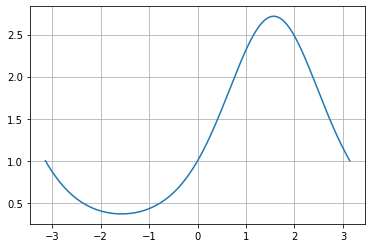

In [3]:
t_arange = np.arange(-T, T, step)
b_arange = [b_t(t) for t in t_arange]

plt.plot(t_arange, b_arange)
plt.grid(True)
plt.show()

### ШАГ 1.

Задаем массив значений параметра $p$. Значения от 1 до 5 с шагом 0.5 Для каждого значения $p$ проделаем цикл (пояснение цикла далее).

In [4]:
start_p = 0
end_p = 10
step_p = 0.001

p_values = np.arange(start_p, end_p, step_p)

### ШАГ 2.

Вычисляем значение фундаментальной матрицы системы (1) при t = T любой программы численного решения задач Коши.

Для этого решаем две задачи Коши с начальными векторами $V_1 =(1 0)$ и $V_2 = (0 1)$ на отрезке $[0;T]$. Пусть вектор-функции $U(t,V_1 )$, $U(t,V_2 )$ - решения этих задач. Они являются столбцами фундаметальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0) = E$. Основную матрицу C для $\Phi(t)$ получаем из форулы $С = \Phi(T)$. Столбцы матрицы $C$ это векторы $U(T,V_1 )$, $U(T,V_2 )$.

### ШАГ 3.

Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.

$r(p) = max_{j=1,2}|\lambda_j|$

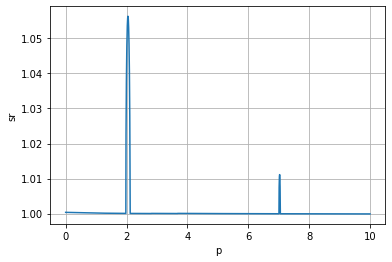

In [5]:
interval = (0, T)
v_1 = (1, 0)
v_2 = (0, 1)
sr_values = []

for p in p_values:
    de_system_func = lambda t, values: [values[1], -a_p_t(p, t) * values[0]]
    u1 = integrate.solve_ivp(de_system_func, interval, v_1)
    u2 = integrate.solve_ivp(de_system_func, interval, v_2)
    c = np.array([[u1.y[0][-1], u2.y[0][-1]],
               [u1.y[1][-1], u2.y[1][-1]]])
    sr = max(abs(np.linalg.eigvals(c)))
    sr_values.append(sr)
    
plt.xlabel("p")
plt.ylabel("sr")
plt.plot(p_values, sr_values)
plt.grid(True)

### ШАГ 4.

Вывод об устойчивости или неустойчивости делается в зависимости
от значения 𝑟(𝑝).

Определим точку $p_0$  с точностью $|r(p_0)|<0.001$

In [6]:
p0 = None
rp0 = None

for i in range(1, len(sr_values)):
    if abs(sr_values[-i] - 1) > 0.001:
        p0 = p_values[-i + 1]
        rp0 = sr_values[-i + 1]
        break

print("p0 = {}, r(p0) = {}".format(p0, rp0))

p0 = 7.05, r(p0) = 0.9999373163988348


Построим график спектрального радиуса основной матрицы при различных параметрах $p$ с отмеченной на нем точкой $p_0$:

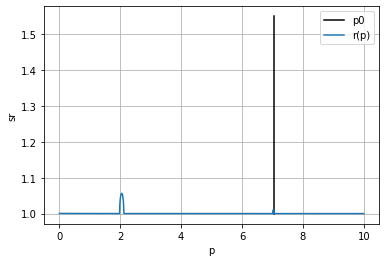

In [7]:
plt.xlabel("p")
plt.ylabel("sr")
plt.plot([p0, p0], [0.999, 1.55], color="black", label="p0")
plt.plot(p_values, sr_values, label="r(p)")
plt.grid(True)
plt.legend()

Рассмотрим промежуток $[7.0,7.1]$ поближе:

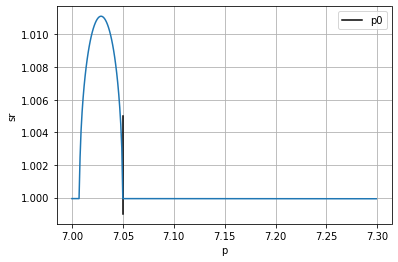

In [8]:
plt.xlabel("p")
plt.ylabel("sr")
plt.plot([p0, p0], [0.999, 1.005], color="black", label="p0")
plt.plot(p_values[-int(3 / step):-int(2.7 / step)], sr_values[-int(3 / step):-int(2.7 / step)])
plt.grid(True)
plt.legend()

Судя по графикам, граница между зонами устойчивости и неустойчивости найдена корректно и равна $p_0 = 7.05$. При значениях наблюдаются области со значением $r(p)>1$. При таких значениях, по крайней мере, часть решений системы не ограничена.

### Выводы.

В ходе практической работы было проведено изучение устойчивости системы однородных линейных ОДУ с переодическими коэффициетами при $t->\infty$.

Были получены следующие результаты:
- Найдена граница зоны устойчивости и неустойчивости $p_0 = 7.05$
- При $p > p_0 = 7.05$ система является устойчивой;
- При $p < p_0 = 7.05$ система является неустойчивой;

Значение $p_0$ было найдено с точностью $|r(p_0)|<0.001$